In [1]:
using Revise
using RDDIP
using Random
using Plots
using Gurobi
using Statistics
const GRB_ENV = Gurobi.Env()
optimizer=() -> Gurobi.Optimizer(GRB_ENV)

Set parameter Username
Set parameter LicenseID to value 2658456
Academic license - for non-commercial use only - expires 2026-04-28


#15 (generic function with 1 method)

In [29]:
instance=RDDIP.parse_nc4("Data/T-Ramp/10_0_1_w.nc4",  optimizer, 24; N1 = 8); instance.N
# instance=RDDIP.parse_nc4("Data/T-Ramp/20_0_2_w.nc4",  optimizer, 24; N1 = 15); instance.N
# instance=RDDIP.parse_IEEE_JEAS("6bus_JEAS",  optimizer; N1=1, NumWind=3); instance.N 
# instance=RDDIP.parse_IEEE_JEAS("118_syst_JEAS",  optimizer; N1=35, NumWind=91); instance.N 
instance.Thermalunits[1].LinearTerm

43.0

In [30]:
res = RDDIP.benders_RO_bin_callback(instance, RDDIP.CuttingPlane; silent=false, Γ=1, force=1, gap=0.1, timelimit=30);

Set parameter Threads to value 1
Set parameter MIPGap to value 0.001
Set parameter Presolve to value 0
Set parameter Threads to value 1
Set parameter TimeLimit to value 20
Set parameter MIPGap to value 0.001
Set parameter Threads to value 1
Set parameter TimeLimit to value 5
Set parameter Threads to value 1
Set parameter TimeLimit to value 10
Set parameter Threads to value 1
Set parameter TimeLimit to value 10
Set parameter TimeLimit to value 2.9999999046325684e+01
Set parameter LazyConstraints to value 1
Set parameter MIPGap to value 0.001
Set parameter LazyConstraints to value 1
Set parameter Threads to value 1
Set parameter TimeLimit to value 2.9999999046325684e+01
Set parameter Presolve to value 0
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (linux64 - "Ubuntu 22.04.5 LTS")

CPU model: Intel(R) Core(TM) Ultra 9 185H, instruction set [SSE2|AVX|AVX2]
Thread count: 22 physical cores, 22 logical processors, using up to 1 threads

Non-default parameters:
TimeLimit  2.999999904632568

In [5]:
res = RDDIP.benders_RO_callback(instance; silent=false, Γ=1, force=1, gap=0.1, timelimit=120)
# twoROmodel = RDDIP.benders_RO_bin_callback(instance; silent=false, Γ=1, force=1, gap=0.5, timelimit=30);
# twoROmodel[end]
# res = RDDIP.benders_RO_bin_callback(instance; silent=false, Γ=2, force=1, gap=0.1, timelimit=60);

Set parameter Threads to value 1
Set parameter TimeLimit to value 5
Set parameter Threads to value 1
Set parameter TimeLimit to value 5
Set parameter TimeLimit to value 120
Set parameter LazyConstraints to value 1
Set parameter MIPGap to value 0.001
Set parameter LazyConstraints to value 1
Set parameter MIPGap to value 0.001
Set parameter Threads to value 1
Set parameter TimeLimit to value 120
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (linux64 - "Ubuntu 22.04.5 LTS")

CPU model: Intel(R) Core(TM) Ultra 9 185H, instruction set [SSE2|AVX|AVX2]
Thread count: 22 physical cores, 22 logical processors, using up to 1 threads

Non-default parameters:
TimeLimit  120
MIPGap  0.001
Threads  1
LazyConstraints  1

Optimize a model with 1946 rows, 2700 columns and 32872 nonzeros
Model fingerprint: 0x49580642
Variable types: 1970 continuous, 730 integer (730 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+03]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  R

("Data/T-Ramp/10_0_1_w.nc4", 2.3439178466796875, 1.8638992e6, 1.862044899999998e6, Dict(Symbol("is_on[3,8]") => 1.0, Symbol("is_on[1,14]") => 1.0, Symbol("is_on[8,4]") => 0.0, Symbol("is_on[4,4]") => 0.0, Symbol("is_on[1,17]") => 1.0, Symbol("is_on[7,0]") => 1.0, Symbol("is_on[4,23]") => 1.0, Symbol("is_on[1,20]") => 1.0, Symbol("is_on[3,5]") => 1.0, Symbol("is_on[7,10]") => 1.0…), Dict(Symbol("is_on[9,9]") => 1.0, Symbol("is_on[10,24]") => 1.0, Symbol("is_on[10,21]") => 1.0, Symbol("is_on[10,22]") => 1.0, Symbol("is_on[9,3]") => 0.0, Symbol("is_on[9,2]") => 0.0, Symbol("is_on[10,19]") => 1.0, Symbol("is_on[10,9]") => 1.0, Symbol("is_on[9,5]") => 0.0, Symbol("is_on[10,8]") => 1.0…))

In [31]:
twoROmodel = RDDIP.initialize_twoROmodel(instance, 0.1, 1, RDDIP.CuttingPlane);

Set parameter Threads to value 1
Set parameter TimeLimit to value 20
Set parameter MIPGap to value 0.001
Set parameter Threads to value 1
Set parameter TimeLimit to value 5
Set parameter Threads to value 1
Set parameter TimeLimit to value 10
Set parameter Threads to value 1
Set parameter TimeLimit to value 10


In [32]:
# res[5]
N1 = instance.N1
iter = 192
states_1 = res[5]
# solution_xN1 = [res2[5][1][1:N1,:], res2[5][2][1:N1,:], res2[5][3][1:N1,:]]
# solution_xN2 = res[6]
# solution_xN2 = [res2[5][1][N1+1:end,:], res2[5][2][N1+1:end,:], res2[5][3][N1+1:end,:]]
# worst_case_cost, worst_case, theta_val, dual_var_state, dual_uncertainty, dual_demand = RDDIP.get_worst_case_RO_lagrangian(twoROmodel, solution_xN1, solution_xN2, instance; cut = nothing)
# twoROmodel.lagrangian.dual_var_is_on
# worst_case
# theta_val
# res[5][1].-res2[5][1][1:N1,:]

Dict{Symbol, Float64} with 200 entries:
  Symbol("is_on[3,8]")  => 1.0
  Symbol("is_on[1,14]") => 1.0
  Symbol("is_on[8,4]")  => -0.0
  Symbol("is_on[4,4]")  => 1.0
  Symbol("is_on[1,17]") => 1.0
  Symbol("is_on[7,0]")  => 1.0
  Symbol("is_on[4,23]") => 1.0
  Symbol("is_on[1,20]") => 1.0
  Symbol("is_on[3,5]")  => 1.0
  Symbol("is_on[7,10]") => 1.0
  Symbol("is_on[8,20]") => 0.0
  Symbol("is_on[4,3]")  => 1.0
  Symbol("is_on[5,24]") => 1.0
  Symbol("is_on[4,12]") => 1.0
  Symbol("is_on[6,22]") => 0.0
  Symbol("is_on[4,8]")  => 1.0
  Symbol("is_on[7,24]") => 1.0
  Symbol("is_on[6,15]") => 1.0
  Symbol("is_on[6,13]") => 1.0
  ⋮                     => ⋮

In [139]:
res_SB = RDDIP.get_SB_cut_RO(twoROmodel, states_1, worst_case)
dual = res_SB.sol_dual_var_states_1

Dict{Symbol, Float64} with 200 entries:
  Symbol("is_on[3,8]")  => -1470.0
  Symbol("is_on[1,14]") => -1888.0
  Symbol("is_on[8,4]")  => 0.0
  Symbol("is_on[1,10]") => -4615.56
  Symbol("is_on[4,4]")  => -565.0
  Symbol("is_on[1,17]") => -3393.13
  Symbol("is_on[8,3]")  => -48079.0
  Symbol("is_on[7,0]")  => 14322.0
  Symbol("is_on[4,23]") => -1634.83
  Symbol("is_on[4,17]") => -2571.35
  Symbol("is_on[1,20]") => -2124.0
  Symbol("is_on[1,22]") => -2415.16
  Symbol("is_on[3,5]")  => -1470.0
  Symbol("is_on[4,9]")  => -4002.49
  Symbol("is_on[2,17]") => -3183.88
  Symbol("is_on[7,10]") => -4807.9
  Symbol("is_on[2,14]") => -1666.0
  Symbol("is_on[8,20]") => 0.0
  Symbol("is_on[4,3]")  => -565.0
  ⋮                     => ⋮

In [ ]:
n = sqrt(sum(g^2 for (name, g) in resL.gradient))
println((n, resL.objective))
α = (1.598275799999999e6-resL.objective)/n^2
if n^2 >= 1
    for (name, g) in resL.gradient
        dual[name] = dual[name] + α*g/n
    end
end

(0.0, 1.595894259682104e6)


In [167]:
resL = RDDIP.compute_lagrangian_gradient(twoROmodel, states_1, worst_case, dual)

1.5971461e6


(objective = 1.595894259682104e6, sol_dual_var_states_1 = Dict(Symbol("is_on[3,8]") => -1402.745202388408, Symbol("is_on[1,14]") => -1835.6591103778605, Symbol("is_on[8,4]") => 0.0, Symbol("is_on[1,10]") => -4464.824961726368, Symbol("is_on[4,4]") => -565.0, Symbol("is_on[1,17]") => -3340.786769952328, Symbol("is_on[8,3]") => -48079.0, Symbol("is_on[7,0]") => 14322.0, Symbol("is_on[4,23]") => -1567.7339298216264, Symbol("is_on[4,17]") => -2571.3510638297867…), gradient = Dict(Symbol("is_on[3,8]") => 0.0, Symbol("is_on[1,14]") => 0.0, Symbol("is_on[8,4]") => 0.0, Symbol("is_on[1,10]") => 0.0, Symbol("is_on[4,4]") => 0.0, Symbol("is_on[1,17]") => 0.0, Symbol("is_on[8,3]") => -0.0, Symbol("is_on[7,0]") => 0.0, Symbol("is_on[4,23]") => 0.0, Symbol("is_on[4,17]") => 0.0…))

In [89]:
n = sqrt(sum(g^2 for (name, g) in resL.gradient))
n, (1.598275799999999e6-resL.objective)/n^2

(5.291502622129181, 187.98058087063586)

In [42]:
worst_case_continuous = RDDIP.get_worst_case_RO_continuous(twoROmodel, states_1)

obj_continuous, bound, states_2 = RDDIP.solve_second_stage_RO(twoROmodel, states_1, worst_case_continuous)

(objective = 1.5971461e6, bound = 1.595594997119341e6, states_2_val = Dict(Symbol("is_on[9,0]") => 0.0, Symbol("is_on[9,9]") => 1.0, Symbol("is_on[10,12]") => 1.0, Symbol("is_on[9,23]") => 1.0, Symbol("is_on[10,24]") => 1.0, Symbol("is_on[9,7]") => 0.0, Symbol("is_on[10,6]") => 1.0, Symbol("is_on[10,14]") => 1.0, Symbol("is_on[9,14]") => 1.0, Symbol("is_on[10,21]") => 1.0…))

In [44]:
RDDIP.get_lagrangian_cut(twoROmodel, states_1, states_2, worst_case)

(0, 1.0e9, 0.0, 100.0)
740432.0
7.0
(1, 1.5971461e6, 1.5727584174513398e6, 1.5269537676396867)
22373.0
12.0
(2, 1.5971461e6, 1.5735888865877974e6, 1.474956700091661)
23082.0
11.0
(3, 1.5971461e6, 1.5748101418566778e6, 1.3984918564007551)
42424.0
16.0
(4, 1.5971461e6, 1.5763965838518601e6, 1.2991620583827588)
19754.0
3.0
(5, 1.5971461e6, 1.5782201155608858e6, 1.1849876751484627)
51168.0
5.0
(6, 1.5971461e6, 1.5782201155608858e6, 1.1849876751484627)
22760.0
8.0
(7, 1.5971461e6, 1.5782201155608858e6, 1.1849876751484627)
18614.0
6.0
(8, 1.5971461e6, 1.5782201155608858e6, 1.1849876751484627)
27410.0
15.0
(9, 1.5971461e6, 1.5782201155608858e6, 1.1849876751484627)
47360.0
4.0
(10, 1.5971461e6, 1.5782201155608858e6, 1.1849876751484627)
58480.0
13.0
(11, 1.5971461e6, 1.5782201155608858e6, 1.1849876751484627)
37517.00000000023
16.0
(12, 1.5971461e6, 1.5846432176718495e6, 0.7828264632866436)
24388.0
11.0
(13, 1.5971461e6, 1.5862267702834797e6, 0.683677574426058)
41249.9999999986
13.0
(14, 1.59714

(objective = 1.5956591713942385e6, bound = 1.5971460999999999e6, iteration = 19, sol_dual_var_states_1 = Dict(Symbol("is_on[3,8]") => -2415.0, Symbol("is_on[1,14]") => -1888.0, Symbol("is_on[8,4]") => 605.0, Symbol("is_on[1,10]") => -2360.0, Symbol("is_on[4,4]") => -565.0, Symbol("is_on[1,17]") => -2124.0, Symbol("is_on[8,3]") => -48079.0, Symbol("is_on[7,0]") => 14322.0, Symbol("is_on[4,23]") => -1130.0, Symbol("is_on[4,17]") => -1356.0…))

In [35]:
worst_case_cost_obj, worst_case = RDDIP.get_worst_case_RO_lagrangianUncertainty_callback(twoROmodel, states_1, states_2)

Time worst-case Lagrangian Uncertainty callback: 0.2027289867401123


(objective = 1.598275799999999e6, worst_case = Dict(Symbol("uncertainty[13]") => 0.0, Symbol("uncertainty[16]") => -0.0, Symbol("uncertainty[2]") => -0.0, Symbol("uncertainty[14]") => -0.0, Symbol("uncertainty[18]") => -0.0, Symbol("uncertainty[22]") => -0.0, Symbol("uncertainty[24]") => -0.0, Symbol("uncertainty[19]") => -0.0, Symbol("uncertainty[10]") => -0.0, Symbol("uncertainty[1]") => -0.0…))

In [40]:
RDDIP.solve_second_stage_RO(twoROmodel, states_1, worst_case)

(objective = 1.5986311e6, bound = 1.5971460999999996e6, states_2_val = Dict(Symbol("is_on[9,0]") => 0.0, Symbol("is_on[9,9]") => 1.0, Symbol("is_on[10,12]") => 1.0, Symbol("is_on[9,23]") => 1.0, Symbol("is_on[10,24]") => 1.0, Symbol("is_on[9,7]") => 0.0, Symbol("is_on[10,6]") => 1.0, Symbol("is_on[10,14]") => 1.0, Symbol("is_on[9,14]") => 1.0, Symbol("is_on[10,21]") => 1.0…))

In [39]:
worst_case_cost_obj, worst_case = RDDIP.get_worst_case_RO_enumeration(twoROmodel, states_1, instance, 1)

(objective = 1.5986311e6, worst_case = Dict(Symbol("uncertainty[13]") => 0.0, Symbol("uncertainty[16]") => 0.0, Symbol("uncertainty[2]") => 0.0, Symbol("uncertainty[14]") => 0.0, Symbol("uncertainty[18]") => 0.0, Symbol("uncertainty[22]") => 0.0, Symbol("uncertainty[24]") => 0.0, Symbol("uncertainty[19]") => 0.0, Symbol("uncertainty[10]") => 0.0, Symbol("uncertainty[1]") => 1.0…))

In [69]:
# twoROmodel.lagrangianUncertainty.dual_var_is_on
# [t for t in 1:24 if worst_case[t]>0.1]
# worst_case = Dict(t => 0.0 for t in 1:24)
RDDIP.solve_second_stage_RO(twoROmodel, solution_xN1, worst_case, instance)

(1.6381407e6, 1.6380407000000002e6, [[0.0 0.0 … 1.0 0.0; 1.0 1.0 … 1.0 1.0], [-0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 1.0; 0.0 0.0 … 0.0 0.0]])

In [30]:
price_demand = RDDIP.get_price_demand_RO(twoROmodel, states_1, worst_case, instance)

results_price_relaxation = RDDIP.solve_price_relaxation(twoROmodel, instance, price_demand, states_1, worst_case)

4.44571242992857e6


RDDIP.ResultsPriceRelaxation(4.443383890490159e6, [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 9.498021863285961 … 0.0 0.0; 0.0 9.487011860818006 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [17.815250845075003 17.815215225536274 … 17.815193261936816 17.803423382034175; 26.344442848637822 26.339477625226433 … 26.336415985965758 18.514239709657236; … ; 295.8321210528192 295.82532430580466 … 295.8211333186565 291.44662316050534; 295.8321210528191 295.82532430580454 … 295.8211333186564 291.44662316050534], [-309.26426426426434 309.26426426426434 … 175.0 -0.0; 82.85785785785788 -82.85785785785788 … 175.0 -0.0; … ; 253.12812812812814 -253.12812812812814 … 175.0 -0.0; 253.12812812812814 -253.12812812812814 … 175.0 -0.0])

In [40]:
twoROmodel = RDDIP.benders_RO_bin_callback2(instance; silent=false, Γ=1, force=1, gap=0.5, timelimit=10);

Set parameter Threads to value 1
Set parameter TimeLimit to value 5
Set parameter Threads to value 1
Set parameter TimeLimit to value 20
Set parameter Threads to value 1
Set parameter TimeLimit to value 5
Set parameter Threads to value 1
Set parameter TimeLimit to value 10


In [28]:
results_price = RDDIP.get_optimal_price_demand(twoROmodel, states_1, states_2, worst_case, instance)

RDDIP.ResultsPriceRelaxation(1.5894116181928373e6, [0.0 0.0 … 0.0 0.0; 22.350192097862433 0.0 … 0.0 0.0; … ; 4.350192097862433 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 17.197023653259606 8.197023653259606; 0.0 8.350192097862433 … 9.197023653259606 4.197023653259606], [67.35019209786243; 63.0; … ; 54.0; 54.802976346740394;;], [-940.0; -970.0; … ; -1056.0; -1027.0;;])

In [39]:
results_price.price_demand

24×1 Matrix{Float64}:
  69.0
  54.0
  54.0
  54.0
  54.0
  59.0
  59.0
  54.0
  80.36887231477708
  73.0657540878575
   ⋮
 300.0
  61.481984220847245
  61.0
  61.0
  61.0
  97.33138899159817
  63.78807476222158
  61.255848908793986
  56.744151091206014

In [41]:
price_demand

24×1 Matrix{Float64}:
  69.0
  54.0
  54.0
  54.0
  54.0
  54.0
  59.0
  59.0
  67.0
  63.0
   ⋮
 300.0
  61.0
  61.0
  61.0
  61.0
  61.0
 300.0
  59.0
  59.0

In [224]:
sqrt(sum(abs2, results_price_relaxation.gradient)), (worst_case_cost_obj - results_price_relaxation.obj)/sum(abs2, results_price_relaxation.gradient)

(407.1040264551556, 0.16118973918335955)

In [305]:
α = 0.01*(worst_case_cost_obj - results_price_relaxation.obj)/sum(abs2, results_price_relaxation.gradient)
println("Step size α = $α")
price_demand=max.(min.(price_demand+α*results_price_relaxation.gradient, RDDIP.SHEDDING_COST), -RDDIP.CURTAILEMENT_COST)
# price_demand[13:24,:]

Step size α = 0.0007477777215092669


24×1 Matrix{Float64}:
  70.89013804329949
  54.62631863194462
  53.93484359686786
  53.98396557231791
  54.02655150691013
  58.03968031535823
  57.73908853085911
  60.15107793121288
  80.35485309376038
  75.95538177273151
   ⋮
 300.0
  63.25509490065854
  61.00455826863838
  60.985989953821715
  61.05624213287042
  61.017107270170236
 158.1093069812418
  53.4019887173649
  54.03035028765321

In [126]:
results_price_relaxation.gradient[22]

1255.96875

In [125]:
price_demand[22]

300.004

In [68]:
iter = 191
# for i in 1:instance.N1
#     for t in 1:24
#         if abs(list_cuts[iter].is_on[i,t] - list_cuts[iter-1].is_on[i,t])>1e-6
#             println((i,t, list_cuts[iter].is_on[i,t], list_cuts[iter-1].is_on[i,t]))
#         end
#     end
# end

for t in 1:24
    if abs(list_cuts[iter].uncertainty[t] - list_cuts[iter-1].uncertainty[t])>1e-6
        println((t, list_cuts[iter].uncertainty[t], list_cuts[iter-1].uncertainty[t]))
    end
end

for i in 1:instance.N1
    for t in 1:24
        if abs(list_cuts[iter].dual_var_is_on[i,t] - list_cuts[iter-1].dual_var_is_on[i,t])>1e-6
            println((i,t, list_cuts[iter].dual_var_is_on[i,t], list_cuts[iter-1].dual_var_is_on[i,t]))
        end
    end
end

# for t in 1:24
#     if abs(list_cuts[iter].dual_var_uncertainty[t] - list_cuts[iter-1].dual_var_uncertainty[t])>1e-6
#         println((t, list_cuts[iter].dual_var_uncertainty[t], list_cuts[iter-1].dual_var_uncertainty[t]))
#     end
# end

solution_xN1[1][6,1:9]
# list_cuts[iter].dual_var_uncertainty

(6, 17, 100.0, -24.0)
(6, 18, -37931.00000000089, 100.0)


9-element Vector{Float64}:
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

In [23]:
# println([t for t in 1:24 if worst_case[t]>=0.5])
# theta_val
# dual_uncertainty

[17]


76498.4955062535

In [22]:
RDDIP.solve_second_stage_RO_lagrangian(twoROmodel, instance, sol_dual_var, sol_dual_uncertainty)

(76498.49550625352, 76498.49550625352, [Dict((3, 23) => 1.0, (1, 12) => 1.0, (1, 15) => 1.0, (2, 22) => 0.0, (3, 12) => 1.0, (3, 15) => 1.0, (1, 9) => 1.0, (2, 1) => 1.0, (2, 17) => 1.0, (2, 18) => 1.0…), Dict((3, 23) => 0.0, (1, 12) => 0.0, (1, 15) => 0.0, (2, 22) => 0.0, (3, 12) => 0.0, (3, 15) => 0.0, (1, 9) => 0.0, (2, 1) => 0.0, (2, 17) => 0.0, (2, 18) => 0.0…), Dict((3, 23) => 0.0, (1, 12) => 0.0, (1, 15) => 0.0, (2, 22) => 0.0, (3, 12) => 0.0, (3, 15) => 0.0, (1, 9) => 0.0, (2, 1) => 0.0, (2, 17) => 0.0, (2, 18) => 0.0…)], Dict(5 => 0.0, 16 => 0.0, 20 => 0.0, 12 => 0.0, 24 => 0.0, 8 => 0.0, 17 => 1.0, 1 => 0.0, 19 => 0.0, 22 => 0.0…))

In [10]:
dual_uncertainty[12:20]

9-element Vector{Float64}:
 -3470.6699999999996
 -3560.0460000000007
 -3580.9199999999996
 -3658.242
 -3760.113
  1168.0312451478053
 -3627.0780000000004
 -3615.7590000000005
 -3489.045

In [11]:
twoROmodel.lagrangian.dual_demand
sum(dual_demand[16, :])
dual_demand

24×6 Matrix{Float64}:
 13.5  13.5      13.5      13.5      13.5      13.5
 13.5  13.5      13.5      13.5      13.5      13.5
 13.5  13.5      13.5      13.5      13.5      13.5
 13.5  13.5      13.5      13.5      13.5      13.5
 13.5  13.5      13.5      13.5      13.5      13.5
 13.5  13.5      13.5      13.5      13.5      13.5
 13.5  13.5      13.5      13.5      13.5      13.5
 13.5  13.5      13.5      13.5      13.5      13.5
 13.5  13.5      13.5      13.5      13.5      13.5
 13.5  13.5      13.5      13.5      13.5      13.5
  ⋮                                             ⋮
 13.5  75.2571  117.901   -80.2254  300.0     138.646
 13.5  15.5726   17.0038   10.3545   23.1152   17.7
 17.7  17.7      17.7      17.7      17.7      17.7
 17.7  17.7      17.7      17.7      17.7      17.7
 13.5  17.6452   20.5075    7.209    32.7303   21.9
 13.5  13.5      13.5      13.5      13.5      13.5
 17.7  17.7      17.7      17.7      17.7      17.7
 13.5  13.5      13.5      13.5      13.5 

In [32]:
solution_xN = [res[5][1], res[5][2], res[5][3]]
obj, bound, price_demand = RDDIP.get_price_demand_RO(twoROmodel, solution_xN, worst_case, instance)

(70345.10709567332, 70345.10709567332, [13.5 13.5 … 13.5 13.5; 13.5 13.5 … 13.499999999999998 13.5; … ; 13.5 13.5 … 13.5 13.5; 13.5 13.5 … 13.5 13.5])

In [43]:
# dual_demand[12,1], price_demand[12,1]
# Matrix{Float64}(undef, 24, length(instance.Buses))
# price_demand
RDDIP.solve_price_relaxation(twoROmodel, instance, price_demand, solution_xN1, worst_case)

(-70233.77670233192, -9122.191339144407, 147354.7388031575, 67998.77076168117)

In [14]:
# worst_case = Dict(t => 0.0 for t in 1:24)
# worst_case[16] = 1
RDDIP.solve_second_stage_RO(twoROmodel, solution_xN1, worst_case, instance)

(70017.98633820354, 70017.9863382033, [[1.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]])

In [59]:
res

("IEEE54", 123.58729410171509, 1.60311664234638e6, 1.594766000862256e6, [[1.0 1.0 … 1.0 1.0; 1.0 1.0 … 1.0 1.0; … ; 1.0 1.0 … -0.0 -0.0; 1.0 1.0 … -0.0 -0.0], [-0.0 0.0 … -0.0 -0.0; -0.0 0.0 … -0.0 -0.0; … ; -0.0 0.0 … 0.0 -0.0; -0.0 0.0 … -0.0 -0.0], [-0.0 -0.0 … 0.0 0.0; -0.0 -0.0 … 0.0 0.0; … ; -0.0 1.0 … -0.0 0.0; -0.0 1.0 … 0.0 0.0]], Any[0.18879008293151855, 0.09078097343444824, 0.15878510475158691, 0.15553593635559082, 0.1548478603363037, 0.1533191204071045, 0.1710069179534912, 0.1731870174407959, 0.6281750202178955, 0.40357398986816406  …  0.8617291450500488, 2.1986329555511475, 5.003310203552246, 5.00334095954895, 5.004845857620239, 5.004293203353882, 5.003326892852783, 5.003337144851685, 5.003527879714966, 4.9812140464782715], 0.1, 1)

In [12]:
res = RDDIP.CCG_algo(instance; silent=true, Γ=3, MaxIter = 5, gap = 0.1)

71.246
Set parameter Threads to value 1
Set parameter TimeLimit to value 5
VariableRef[dual_var_demand[1,1]; dual_var_demand[2,1]; dual_var_demand[3,1]; dual_var_demand[4,1]; dual_var_demand[5,1]; dual_var_demand[6,1]; dual_var_demand[7,1]; dual_var_demand[8,1]; dual_var_demand[9,1]; dual_var_demand[10,1]; dual_var_demand[11,1]; dual_var_demand[12,1]; dual_var_demand[13,1]; dual_var_demand[14,1]; dual_var_demand[15,1]; dual_var_demand[16,1]; dual_var_demand[17,1]; dual_var_demand[18,1]; dual_var_demand[19,1]; dual_var_demand[20,1]; dual_var_demand[21,1]; dual_var_demand[22,1]; dual_var_demand[23,1]; dual_var_demand[24,1];;]
(378144.0, 1.46601e6)
[13, 16, 22]
(1, 1.8439770793123047e6, 1.9028989097832644e6, 3.0964246270796756)
[-21373.8, -21373.8, -21373.8, -21373.8, -21373.8, -21373.8, -21373.8, -21373.8, -21373.8, -21373.8, -21373.8, -21373.8, 21373.8, -21373.8, -21373.8, 20447.7, -21373.8, -21373.8, -21373.8, -21373.8, -21373.8, 18830.7, -21373.8, -21373.8]
[-457.7124868835257, -483.5

(5, 1.8833074889999998e6, 1.8834356681190755e6, 0.006805601128052157, (2-dimensional DenseAxisArray{Float64,2,...} with index sets:
    Dimension 1, Base.OneTo(10)
    Dimension 2, 0:24
And data, a 10×25 Matrix{Float64}:
 0.0  0.0  0.0  -0.0  -0.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0   1.0  1.0
 1.0  1.0  1.0   1.0   1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0   1.0  1.0
 0.0  1.0  1.0   1.0   1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0   1.0  1.0
 1.0  1.0  1.0   1.0   1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0   1.0  1.0
 0.0  1.0  1.0   1.0   0.0  0.0  0.0     1.0  1.0  1.0  1.0  1.0   1.0  1.0
 1.0  1.0  1.0   1.0   1.0  1.0  1.0  …  1.0  0.0  0.0  0.0  0.0  -0.0  0.0
 1.0  1.0  1.0   1.0   1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0   1.0  1.0
 1.0  1.0  1.0  -0.0   0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0   0.0  0.0
 0.0  0.0  0.0   0.0   0.0  0.0  0.0     1.0  1.0  1.0  1.0  1.0   1.0  1.0
 1.0  1.0  1.0   1.0   1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0   1.0  1.0, [0.0 0.0 … 0.0 0.0

In [16]:
3158/(1.96*0.025)

64448.97959183673

In [12]:
res[end][10:16]

1-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, [10, 11, 12, 13, 14, 15, 16]
And data, a 7-element Vector{Float64}:
 0.0
 1.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [138]:
println(master_pb)

Min thermal_fixed_cost + thermal_fuel_cost
Subject to
 -is_on[1,0] + is_on[1,1] - start_up[1,1] + start_down[1,1] = 0
 -is_on[1,1] + is_on[1,2] - start_up[1,2] + start_down[1,2] = 0
 is_on[1,0] = 0
 power[1,0] = 0
 power[1,1] + power_shedding[1,1] - power_curtailement[1,1] = 95.3
 power[1,2] + power_shedding[1,2] - power_curtailement[1,2] = 90.2
 power_1[1,0] = 0
 power_1[1,1] + power_shedding_1[1,1] - power_curtailement_1[1,1] = 99.96969999999999
 power_1[1,2] + power_shedding_1[1,2] - power_curtailement_1[1,2] = 94.6198
 power_2[1,0] = 0
 power_2[1,1] + power_shedding_2[1,1] - power_curtailement_2[1,1] = 99.96969999999999
 power_2[1,2] + power_shedding_2[1,2] - power_curtailement_2[1,2] = 94.6198
 power_3[1,0] = 0
 power_3[1,1] + power_shedding_3[1,1] - power_curtailement_3[1,1] = 99.96969999999999
 power_3[1,2] + power_shedding_3[1,2] - power_curtailement_3[1,2] = 94.6198
 power_4[1,0] = 0
 power_4[1,1] + power_shedding_4[1,1] - power_curtailement_4[1,1] = 99.96969999999999
 power_4

In [102]:
res=RDDIP.bin_extensive_neutral_integer(instance; K=10, silent=false, gap=0.0001, timelimit=10);

Set parameter TimeLimit to value 10
Set parameter Threads to value 1
Set parameter MIPGap to value 0.0001
Set parameter MIPGap to value 0.0001
Set parameter Threads to value 1
Set parameter TimeLimit to value 10
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (linux64 - "Ubuntu 22.04.5 LTS")

CPU model: Intel(R) Core(TM) Ultra 9 185H, instruction set [SSE2|AVX|AVX2]
Thread count: 22 physical cores, 22 logical processors, using up to 1 threads

Non-default parameters:
TimeLimit  10
Threads  1

Optimize a model with 3542 rows, 4126 columns and 16862 nonzeros
Model fingerprint: 0x96873ceb
Variable types: 896 continuous, 3230 integer (3230 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+03]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+03]
Presolve removed 320 rows and 389 columns
Presolve time: 0.03s
Presolved: 3222 rows, 3737 columns, 17395 nonzeros
Variable types: 661 continuous, 3076 integer (2981 binary)
Found heuristi

In [ ]:
# res[2][1,:,1,:]
sum(res[end-2])
[sum(res[end][end-k:end]) for k in 0:20]
# res[end-2]
sum(res[7])+sum(res[5])+ sum(res[8]), sum(instance.Demandbus[b][t] for b in 1:6, t in 1:24)
res[7][:, 10]
instance.Thermalunits[3].MinPower

In [5]:
T = 24
graph=RDDIP.LinearGraph(T);

In [61]:
force = 1.0
UB = sum([max(RDDIP.SHEDDING_COST, RDDIP.CURTAILEMENT_COST)*sum(instance.Demandbus[b][t] for b in 1:size(instance.Next)[1]) for t in 1:T])
lipschitz_constant = maximum([max(RDDIP.SHEDDING_COST, RDDIP.CURTAILEMENT_COST)*sum(instance.Demandbus[b][t] for b in 1:size(instance.Next)[1]) for t in 1:T])
model = RDDIP.PolicyGraph(
    RDDIP.subproblem_builder_UC,
    instance,
    force,
    graph,
    sense = :Min,
    lipschitz_constant = lipschitz_constant,
    lower_bound = 0.0,
    upper_bound = UB,
    optimizer = optimizer,
)

A policy graph with 24 nodes.
 Node indices: 1, ..., 24


In [62]:
RDDIP.train(model; iteration_limit = 50, duality_handler = RDDIP.L_ConicDuality(), sampling_scheme = RDDIP.RobustMonteCarlo(), worstcase_strategy = RDDIP.Lagrangian)
# RDDIP.train(model; iteration_limit = 100, duality_handler = RDDIP.SB_ConicDuality(), sampling_scheme = RDDIP.RobustMonteCarlo(), worstcase_strategy = RDDIP.Lagrangian)

-------------------------------------------------------------------
         RDDIP.jl (c) Oscar Dowson and contributors, 2017-25
-------------------------------------------------------------------
problem
  nodes           : 24
  state variables : 27
  scenarios       : 8.86294e+21
  existing cuts   : false
options
  solver          : serial mode
  risk measure    : RDDIP.Expectation()
  sampling scheme : RDDIP.RobustMonteCarlo
subproblem structure
  VariableRef                             : [102, 110]
  AffExpr in MOI.EqualTo{Float64}         : [35, 35]
  AffExpr in MOI.GreaterThan{Float64}     : [16, 43]
  AffExpr in MOI.LessThan{Float64}        : [28, 55]
  VariableRef in MOI.GreaterThan{Float64} : [22, 22]
  VariableRef in MOI.LessThan{Float64}    : [1, 1]
  VariableRef in MOI.ZeroOne              : [34, 42]
numerical stability report
  matrix range     [4e-01, 2e+02]
  objective range  [1e+00, 3e+02]
  bounds range     [2e+06, 2e+06]
  rhs range        [1e+00, 2e+02]
-------------

RDDIP.TrainingResults(:iteration_limit, RDDIP.Log[RDDIP.Log(1, 3256.3142857142734, 1.8154813142857144e6, 1.5480589866638184, 1, 48, "L", false), RDDIP.Log(2, 50878.66254295311, 121148.244754298, 3.0770320892333984, 1, 96, "L", false), RDDIP.Log(3, 50878.66254295311, 121148.24475429798, 4.742496013641357, 1, 144, "L", false), RDDIP.Log(4, 68288.84101375283, 121148.24475429798, 6.487695932388306, 1, 192, "L", false), RDDIP.Log(5, 78997.7085892362, 121148.244754298, 8.397502899169922, 1, 240, "L", false), RDDIP.Log(6, 81551.48450782587, 121148.244754298, 10.223154067993164, 1, 288, "L", false), RDDIP.Log(7, 81551.48450782587, 120302.20189715514, 12.13064193725586, 1, 336, "L", false), RDDIP.Log(8, 81551.48450782587, 119504.91618286943, 14.010360956192017, 1, 384, "L", false), RDDIP.Log(9, 81551.48450782587, 119504.91618286943, 16.0573410987854, 1, 432, "L", false), RDDIP.Log(10, 81551.48450782587, 119504.91618286943, 17.981404066085815, 1, 480, "L", false)  …  RDDIP.Log(41, 82155.77320872

In [18]:
JuMP.is_binary(model[2].states_upper[Symbol("power_integer[2,1]")].out)
JuMP.is_binary(model[2].uncertainties_upper[Symbol("uncertainty[7]")].var)

true

In [7]:
RDDIP.train(model; iteration_limit = 30, duality_handler = RDDIP.SB_ConicDuality(), sampling_scheme = RDDIP.RobustMonteCarlo(), worstcase_strategy = RDDIP.Enumeration)

-------------------------------------------------------------------
         RDDIP.jl (c) Oscar Dowson and contributors, 2017-25
-------------------------------------------------------------------
problem
  nodes           : 24
  state variables : 27
  scenarios       : 8.86294e+21
  existing cuts   : true
options
  solver          : serial mode
  risk measure    : RDDIP.Expectation()
  sampling scheme : RDDIP.RobustMonteCarlo
subproblem structure
  VariableRef                             : [102, 110]
  AffExpr in MOI.EqualTo{Float64}         : [35, 35]
  AffExpr in MOI.GreaterThan{Float64}     : [18, 54]
  AffExpr in MOI.LessThan{Float64}        : [28, 55]
  VariableRef in MOI.EqualTo{Float64}     : [28, 36]
  VariableRef in MOI.GreaterThan{Float64} : [22, 22]
  VariableRef in MOI.LessThan{Float64}    : [1, 1]
  VariableRef in MOI.ZeroOne              : [34, 42]
numerical stability report
  matrix range     [4e-01, 5e+03]
  objective range  [1e+00, 3e+02]
  bounds range     [2e+06, 2e

┌ Warning: Re-training a model with existing cuts!
│ 
│ Are you sure you want to do this? The output from this training may be
│ misleading because the policy is already partially trained.
│ 
│ If you meant to train a new policy with different settings, you must
│ build a new model.
│ 
│ If you meant to refine a previously trained policy, turn off this
│ warning by passing `add_to_existing_cuts = true` as a keyword argument
│ to `RDDIP.train`.
│ 
│ In a future release, this warning may turn into an error.
└ @ RDDIP /home/mathis/Documents/RDDIP/src/algorithm.jl:1329


S  8.367655e+04  8.732760e+04  1.497597e+00     14048   1
         2S  8.367655e+04  8.725974e+04  2.947010e+00     14487   1
         3S  8.367655e+04  8.693438e+04  4.335069e+00     14926   1
         4S  8.369587e+04  8.668772e+04  5.768869e+00     15365   1
         5S  8.372700e+04  8.618837e+04  7.190202e+00     15804   1
         6S  8.372700e+04  8.580832e+04  8.598525e+00     16243   1
         7S  8.375452e+04  8.570383e+04  9.950459e+00     16682   1
        11S  8.375452e+04  8.548557e+04  1.553094e+01     18438   1
        15S  8.375452e+04  8.548557e+04  2.109665e+01     20194   1
        19S  8.375452e+04  8.548557e+04  2.673447e+01     21950   1
        23S  8.375452e+04  8.548557e+04  3.253052e+01     23706   1
        27S  8.375452e+04  8.548557e+04  3.837256e+01     25462   1


RDDIP.TrainingResults(:iteration_limit, RDDIP.Log[RDDIP.Log(1, 83676.55479124379, 87327.60394457141, 1.4975969791412354, 1, 14048, "S", false), RDDIP.Log(2, 83676.55479124379, 87259.739248, 2.947010040283203, 1, 14487, "S", false), RDDIP.Log(3, 83676.55479124379, 86934.38253557138, 4.335068941116333, 1, 14926, "S", false), RDDIP.Log(4, 83695.86615199318, 86687.71718534283, 5.768868923187256, 1, 15365, "S", false), RDDIP.Log(5, 83726.99891748822, 86188.36951677127, 7.190201997756958, 1, 15804, "S", false), RDDIP.Log(6, 83726.99891748824, 85808.31778590602, 8.598525047302246, 1, 16243, "S", false), RDDIP.Log(7, 83754.52181568823, 85703.82581447747, 9.950459003448486, 1, 16682, "S", false), RDDIP.Log(8, 83754.52181568823, 85507.00034774281, 11.354351997375488, 1, 17121, "S", false), RDDIP.Log(9, 83754.52181568823, 85507.00034774281, 12.770009994506836, 1, 17560, "S", false), RDDIP.Log(10, 83754.52181568823, 85485.57177631425, 14.172916889190674, 1, 17999, "S", false)  …  RDDIP.Log(21, 837

In [ ]:
# RDDIP.train(model; iteration_limit = 10, duality_handler = RDDIP.StrengthenedConicDuality(), sampling_scheme = RDDIP.RobustMonteCarlo(), worstcase_strategy = RDDIP.Lagrangian)
RDDIP.train(model; iteration_limit = 10, duality_handler = RDDIP.LagrangianConicDuality(), sampling_scheme = RDDIP.RobustMonteCarlo(), worstcase_strategy = RDDIP.Lagrangian)

In [ ]:
# model[23].bellman_function.global_theta.cuts
# node.upper_bellman_function.global_theta.vertices
# vertex = node.upper_bellman_function.global_theta.vertices[1]
# for (name, value) in vertex.state
#     if value >1e-5
#         println(name, " => ", value)
#     end
# end

model[24].lagrangian_upper.uncertainty

In [ ]:
model[23].bellman_function.global_theta.cuts
node = model[23]
node.upper_bellman_function.global_theta.vertices

In [ ]:
node = model[23]
vertex = node.upper_bellman_function.global_theta.vertices[1]
for (name, value) in vertex.state
    if value >1e-5
        println(name, " => ", value)
    end
end
# RDDIP.compute_lower_bellman_value(
#         node.bellman_function,
#         vertex.state,
#     )
# V = node.bellman_function.global_theta
# state = vertex.state
# value = [cut.intercept + sum(cut.coefficients[i] * state[i] for (i, x) in V.states) for cut in V.cuts]

In [ ]:
RDDIP.train(model; iteration_limit = 10, duality_handler = RDDIP.LagrangianConicDuality(), sampling_scheme = RDDIP.RobustMonteCarlo())

In [ ]:
# Random.seed!(12345)
RDDIP.train(model; iteration_limit = 50, duality_handler = RDDIP.LagrangianDuality(), sampling_scheme = RDDIP.RobustMonteCarlo())
# RDDIP.train(model; iteration_limit = 1, duality_handler = RDDIP.LagrangianConicDuality(), sampling_scheme = RDDIP.RobustMonteCarlo())

# RDDIP.train(model; iteration_limit = 1, duality_handler = RDDIP.LagrangianConicDuality())

In [ ]:
Random.seed!(12345)
RDDIP.train(model; iteration_limit = 100, duality_handler = RDDIP.StrengthenedConicDuality())
# RDDIP.train(model; iteration_limit = 1, duality_handler = RDDIP.LagrangianConicDuality())

In [ ]:
using JuMP

model = Model()
@variable(model, x >= 0)
@variable(model, y >= 0)
@constraint(model, c1, x + y <= 10)
cstr = @constraint(model, c2, 2x - y >= 3)


# cons = all_constraints(model; include_variable_in_set_constraints=true)
# println(cons)

f = JuMP.constraint_object(cstr).func

f.terms
s = JuMP.constraint_object(cstr).set

if s isa MOI.GreaterThan
    println("C’est une contrainte de type ≥ avec borne = ", s.lower)
elseif s isa MOI.LessThan
    println("C’est une contrainte de type ≤ avec borne = ", s.upper)
elseif s isa MOI.EqualTo
    println("C’est une contrainte de type = avec borne = ", s.value)
else
    println("Autre type de contrainte")
end
for (i,k) in f.terms
    println((i,k))
end
# typeof(JuMP.name(x))

In [ ]:
RDDIP.TrainingResults(:iteration_limit, RDDIP.Log[RDDIP.Log(1, 1.428402521661652e6, 1.8350314844269806e6, 3.765532970428467, 1, 140, "S", false), RDDIP.Log(2, 1.4869460945114475e6, 1.9150885666642494e6, 9.079401969909668, 1, 280, "S", false)])

In [ ]:
res=RDDIP.train(model; iteration_limit = 2, print_level = 0, duality_handler = RDDIP.RDDIP.LagrangianConicDuality())

In [ ]:
# string([res.log[i].simulation_value for i in 1:length(res.log)])
1.8574247832686587e6

In [ ]:
println(model[23].subproblem)

In [ ]:
# Création du modèle
model = Model(optimizer)

@variable(model, x >= 0)
@variable(model, y >= 0)
@objective(model, Max, 3x + 5y)
@constraint(model, 2x + 3y <= 12)

optimize!(model)
Dict(name(v) => value(v) for v in all_variables(model))


In [ ]:
println(model[23].subproblem)
# mod = model[23].subproblem
# optimize!(mod)

In [ ]:
node = model[23]
for (key, state) in node.states
    # println((key, value(state.in), JuMP.is_integer(state.in), JuMP.upper_bound(state.in)))
    println((key, state.out, JuMP.is_binary(state.out), node.incoming_state_bounds[key]))
    # println((key, value(state.in), JuMP.is_integer(state.in)))
    # println(JuMP.upper_bound(state.in))
end
JuMP.upper_bound(collect(values(node.states))[1].in)
# collect(values(node.states))[1].in


In [ ]:
println(model[1].subproblem)

In [ ]:
1.806476027737761e6, 1.8289582420327545e6

In [ ]:
mod = JuMP.Model(optimizer)
@variable(mod, x, Bin)
@variable(mod, y )
@objective(mod, Max, x)
# JuMP.optimize!(mod)
# JuMP.termination_status(mod)
undo_relax = JuMP.relax_integrality(mod)
println(mod)
# undo_relax()
# JuMP.upper_bound(x)
using Dualization
md=dualize(mod)
println(md)

In [ ]:
using Dualization
mod = JuMP.Model(optimizer)
@variable(mod, x)
@variable(mod, y)
@constraint(mod, s,x + y <= 10)
@objective(mod, Min, x)

new_model, reference_map = copy_model(mod)
@constraint(new_model, fix_x, reference_map[x] == 1.0)
println(new_model)

md=dualize(new_model; dual_names = DualNames("dual_var_", "dual_con_"))
# println(md)
# reference_map[s]
hexpr = JuMP.objective_function(md)
println(md)
@variable(md, z)
@constraint(md, z <= hexpr)
@objective(md, Max, z)
println(md)
md[Symbol("dual_var_", "s")]

In [ ]:
using Suppressor, Dualization
node = model[24]
mod = node.subproblem
undo_relax = JuMP.relax_integrality(mod)
new_model, reference_map = @suppress copy_model(mod)
undo_relax()
copy_state_out = Dict()
copy_state_in = Dict()
copy_uncertainty = Dict()
# for (name,state) in node.states
#     copy_state_out[name] = JuMP.variable_by_name(new_model, string(name,"_out"))
#     copy_state_in[name] = JuMP.variable_by_name(new_model, string(name,"_in"))
# end
# for (name,uncertainty) in node.uncertainties
#     # println(name, uncertainty)
#     copy_uncertainty[name] = JuMP.variable_by_name(new_model, string(name))
# end
# @constraint(new_model, fix_out[name in keys(copy_state_out)], copy_state_out[name] == 1.0)
# @constraint(new_model, fix_in[name in keys(copy_state_in)], copy_state_in[name] == 0.0)
# @constraint(new_model, fix_uncertainty[name in keys(copy_uncertainty)], copy_uncertainty[name] == 0.0)
# println(new_model)
# md=dualize(new_model; consider_constrained_variables=false, dual_names = DualNames("dual_var_", "dual_con_"))
# hexpr = JuMP.objective_function(md)
# @variable(md, θ)
# @constraint(md, θ <= hexpr)
# @objective(md, Max, θ)
# println(md)
# dual_variables_states_out = Dict(name => md[Symbol("dual_var_fix_out[$name]")] for name in keys(copy_state_out))
# dual_variables_states_in = Dict(name => md[Symbol("dual_var_fix_in[$name]")] for name in keys(copy_state_in))
# dual_variables_uncertainty = Dict(name => md[Symbol("dual_var_fix_uncertainty[$name]")] for name in keys(copy_uncertainty))

In [ ]:
lagrangian = model[24].lagrangian
cstr = lagrangian.upper_constraint
var = dual_variables_states_out[Symbol("power_integer[1,1]")]
set_normalized_coefficient(cstr, var, -1)
set_normalized_rhs(cstr, 3)
cstr

In [ ]:
using JuMP, Dualization
model = Model()
@variable(model, x)
@variable(model, y)
@variable(model, z)
@constraint(model, soccon, [x; y; z] in SecondOrderCone())
@constraint(model, eqcon, x == 1)
@objective(model, Min, y + z)
dual_model = dualize(model; consider_constrained_variables=false, dual_names = DualNames("", ""))
println(dual_model)

In [ ]:
new_model

In [ ]:
dualize(new_model)

In [ ]:
using JuMP, Dualization, LinearAlgebra

# Ton modèle original
model = Model()
@variable(model, x1 >= 0)
@variable(model, x2)
@constraint(model, x2 == 4)
@constraint(model, 2x1 - x2 >= 1)
@constraint(model, x1 + x2 <= 3)
@objective(model, Min, x1 + 2x2)

# --- Étape 1 : standardiser ---
# Dualization.jl fournit un utilitaire pour cela :
# standard_model = Dualization.standard_form(model)

# --- Étape 2 : dualiser ---
dual_model = dualize(model)

println("Nb variables primal standardisé: ", num_variables(model))
# println("Nb contraintes dual: ", num_constraints(dual_model))
println(dual_model)

In [ ]:
println(model[2].lagrangian.model)

In [ ]:
mod = model[2].lagrangian.model
# set_optimizer(mod, optimizer)
set_optimizer_attribute(mod, "Presolve", 0)
println(mod)
unset_silent(mod)  # Remet les sorties du solveur
optimize!(mod)
println("Termination status: ", JuMP.termination_status(mod))
println("Primal status:     ", JuMP.primal_status(mod))
Dict(i =>value.(var) for (i, var) in model[2].lagrangian.dual_variables)
for (i, var) in model[2].lagrangian.dual_variables
    if abs(value(var)) > 1e-6
        println("Variable ", i, " has value ", value(var))
    end
end
println(value(model[2].lagrangian.theta))

In [31]:
using XLSX

# Ouvre le fichier Excel
xlsx = XLSX.readxlsx("results_6bus_1000.xlsx")
Lower_bound = Dict()
Upper_bound = Dict()
computation_time = Dict()
for i in 2:7
    name = xlsx["results"]["A$i"]
    A = xlsx["results"]["C$i"]
    B = parse.(Float64, split(strip(A, ['[', ']']), ","))
    C = xlsx["results"]["E$i"]
    Lower_bound[name] = B
    computation_time[name] = parse.(Float64, split(strip(C, ['[', ']']), ","))
    A = xlsx["results"]["D$i"]
    B = parse.(Float64, split(strip(A, ['[', ']']), ","))
    Upper_bound[name] = B
end

XLSXFile("results_6bus_1000.xlsx") containing 1 Worksheet
            sheetname size          range        
-------------------------------------------------
              results 7x5           A1:E7        


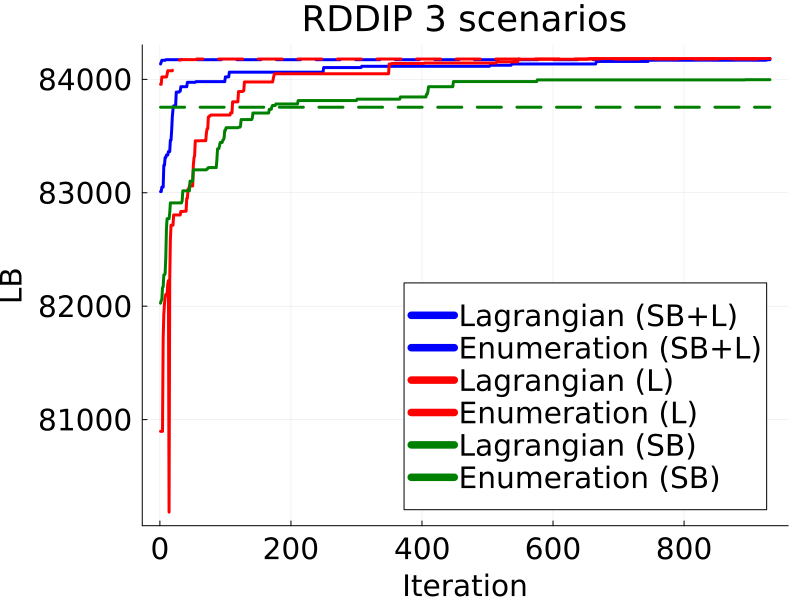

In [ ]:
using Plots
K=50
N=1000

p = plot(title="RDDIP 3 scenarios",
     xlabel="Iteration",
     ylabel="LB",
     legend=:bottomright,
    titlefontsize=24, 
    guidefontsize=20, 
    tickfontsize=20, 
    legendfontsize=20,
    size=(800, 600),
    linewidth=3, )

# Build a color map based on parenthesis groups (e.g., (SB)) so all methods with the same parentheses share a color
color_palette = [:blue, :red, :green, :orange, :purple, :cyan, :magenta, :brown, :black]
color_map = Dict{String,Symbol}()
color_keys = String[]  # keep insertion order of groups
color_idx = 1

function key_of_name(nom)
    m = match(r"\((.*?)\)", nom)
    return m !== nothing ? m.captures[1] : nom
end

# Collect all series first so we can control plotting (and legend) order
series = Any[]
for (nom, valeurs) in Lower_bound
    key = key_of_name(nom)
    if !haskey(color_map, key)
        color_map[key] = color_palette[color_idx]
        push!(color_keys, key)
        color_idx = color_idx == length(color_palette) ? 1 : color_idx + 1
    end
    # choose linestyle: Enumeration -> dashed, Lagrangian -> solid, default solid
    lname = lowercase(nom)
    linestyle = :solid
    if occursin("enumeration", lname)
        linestyle = :dash
    elseif occursin("lagrang", lname) || occursin("lagrangian", lname)
        linestyle = :solid
    end
    x = 1:length(valeurs[K:N-20])
    y = valeurs[K:N-20]
    push!(series, Dict(:nom=>nom, :x=>x, :y=>y, :linestyle=>linestyle, :color=>color_map[key], :group_key=>key))
end

# Now order series by color (in the order color_keys) and within each color put Lagrangian first then Enumeration then others
ordered_series = Any[]
for g in color_keys
    group = filter(s->s[:group_key] == g, series)
    sort!(group, by = s->(occursin("lagrang", lowercase(s[:nom])) ? 0 : occursin("enumeration", lowercase(s[:nom])) ? 1 : 2))
    append!(ordered_series, group)
end

for s in ordered_series
    plot!(s[:x], s[:y], label=s[:nom], linewidth=3, linestyle=s[:linestyle], color=s[:color])
end

display(p)

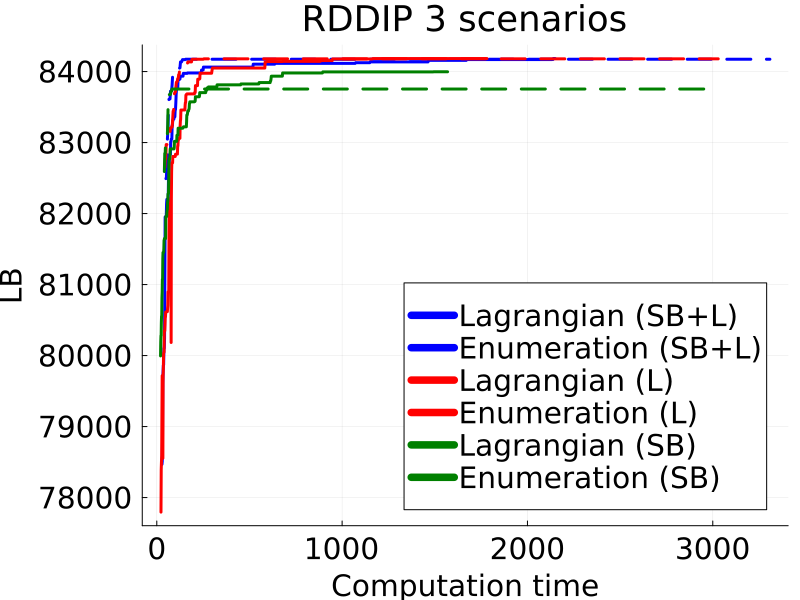

In [36]:
using Plots
K=20
N=1000
p = plot(title="RDDIP 3 scenarios",
     xlabel="Computation time",
     ylabel="LB",
     legend=:bottomright,
    titlefontsize=24, 
    guidefontsize=20, 
    tickfontsize=20, 
    legendfontsize=20,
    size=(800, 600),
    linewidth=3, )

# Reuse same color grouping logic so methods with same parentheses keep the same color
color_palette = [:blue, :red, :green, :orange, :purple, :cyan, :magenta, :brown, :black]
color_map = Dict{String,Symbol}()
color_keys = String[]  # keep insertion order of groups
color_idx = 1

function key_of_name(nom)
    m = match(r"\((.*?)\)", nom)
    return m !== nothing ? m.captures[1] : nom
end

# Collect series so we can control plotting/legend order
series = Any[]
for (nom, valeurs) in Lower_bound
    key = key_of_name(nom)
    if !haskey(color_map, key)
        color_map[key] = color_palette[color_idx]
        push!(color_keys, key)
        color_idx = color_idx == length(color_palette) ? 1 : color_idx + 1
    end
    lname = lowercase(nom)
    linestyle = :solid
    if occursin("enumeration", lname)
        linestyle = :dash
    elseif occursin("lagrang", lname) || occursin("lagrangian", lname)
        linestyle = :solid
    end
    x = computation_time[nom][K:N-20]
    y = valeurs[K:N-20]
    push!(series, Dict(:nom=>nom, :x=>x, :y=>y, :linestyle=>linestyle, :color=>color_map[key], :group_key=>key))
end

ordered_series = Any[]
for g in color_keys
    group = filter(s->s[:group_key] == g, series)
    sort!(group, by = s->(occursin("lagrang", lowercase(s[:nom])) ? 0 : occursin("enumeration", lowercase(s[:nom])) ? 1 : 2))
    append!(ordered_series, group)
end

for s in ordered_series
    plot!(s[:x], s[:y], label=s[:nom], linewidth=3, linestyle=s[:linestyle], color=s[:color])
end

display(p)

In [ ]:
import Pkg

In [ ]:
Pkg.